In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("exoplanet_data.csv")
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [3]:
# Set features. This will also be used as your x values.
selected_features = df.drop(columns=["koi_disposition"])
# Drop the null columns where all values are null
selected_features = selected_features.dropna(axis='columns', how='all')
# Drop the null rows
selected_features = selected_features.dropna()

# Create a Train Test Split

Use `koi_disposition` for the y values

In [4]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(selected_features)
y = df["koi_disposition"].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [5]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model


In [6]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500)
rf = rf.fit(X_train_scaled, np.ravel(y_train,order='C'))
rf

RandomForestClassifier(n_estimators=500)

# Performance Matrix

In [7]:
print(f"Training Data Score: {rf.score(X_train_scaled, y_train)}")
print(f"Test Data Score: {rf.score(X_test_scaled, y_test)}")


Training Data Score: 1.0
Test Data Score: 0.8998855835240275


In [8]:
from sklearn.metrics import classification_report

# Predicted outcomes
predictions = rf.predict(X_test_scaled)
report_randomforest = classification_report(y_test,predictions)
print(report_randomforest)
%store report_randomforest

                precision    recall  f1-score   support

     CANDIDATE       0.83      0.76      0.79       411
     CONFIRMED       0.84      0.85      0.84       484
FALSE POSITIVE       0.97      1.00      0.98       853

      accuracy                           0.90      1748
     macro avg       0.88      0.87      0.87      1748
  weighted avg       0.90      0.90      0.90      1748

Stored 'report_randomforest' (str)


In [9]:
report = classification_report(y_test,predictions)

In [10]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'rf_standardscaler.sav'
joblib.dump(rf, filename)

['rf_standardscaler.sav']

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [11]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_features': ["auto","sqrt"],
    'n_estimators': [200, 300, 500]
}
grid = GridSearchCV(rf, param_grid, verbose=3)

In [12]:
# Train the model with GridSearch
grid.fit(X_train_scaled, np.ravel(y_train,order='C'))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END max_features=auto, n_estimators=200;, score=0.903 total time=   7.2s
[CV 2/5] END max_features=auto, n_estimators=200;, score=0.906 total time=   6.6s
[CV 3/5] END max_features=auto, n_estimators=200;, score=0.884 total time=   6.7s
[CV 4/5] END max_features=auto, n_estimators=200;, score=0.885 total time=   6.4s
[CV 5/5] END max_features=auto, n_estimators=200;, score=0.885 total time=   6.5s
[CV 1/5] END max_features=auto, n_estimators=300;, score=0.903 total time=  10.0s
[CV 2/5] END max_features=auto, n_estimators=300;, score=0.902 total time=   9.8s
[CV 3/5] END max_features=auto, n_estimators=300;, score=0.888 total time=   9.9s
[CV 4/5] END max_features=auto, n_estimators=300;, score=0.885 total time=   9.8s
[CV 5/5] END max_features=auto, n_estimators=300;, score=0.888 total time=   9.8s
[CV 1/5] END max_features=auto, n_estimators=500;, score=0.898 total time=  15.3s
[CV 2/5] END max_features=auto, n_esti

GridSearchCV(estimator=RandomForestClassifier(n_estimators=500),
             param_grid={'max_features': ['auto', 'sqrt'],
                         'n_estimators': [200, 300, 500]},
             verbose=3)

In [13]:
print(grid.best_params_)
print(grid.best_score_)

{'max_features': 'sqrt', 'n_estimators': 200}
0.8935685749423297


In [18]:
rf_pca_gridsearch = RandomForestClassifier(max_features='sqrt' ,n_estimators=200)
rf_pca_gridsearch.fit(X_train_scaled, np.ravel(y_train,order='C'))

RandomForestClassifier(max_features='sqrt', n_estimators=200)

# Performance Matrix

In [19]:
print(f"Training Data Score: {rf_pca_gridsearch.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {rf_pca_gridsearch.score(X_test_scaled, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.9004576659038902


                precision    recall  f1-score      support
CANDIDATE        0.824607  0.766423  0.794451   411.000000
CONFIRMED        0.838446  0.847107  0.842754   484.000000
FALSE POSITIVE   0.968073  0.995311  0.981503   853.000000
accuracy         0.900458  0.900458  0.900458     0.900458
macro avg        0.877042  0.869614  0.872903  1748.000000
weighted avg     0.898448  0.900458  0.899104  1748.000000
Stored 'report_rf_df' (DataFrame)


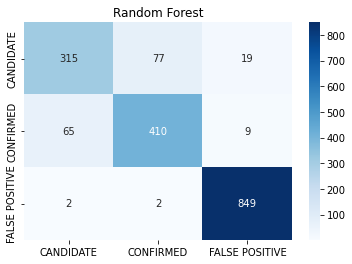

In [27]:
from sklearn.metrics import classification_report,confusion_matrix

# Predicted outcomes
predictions = rf_pca_gridsearch.predict(X_test_scaled)
target = ['CANDIDATE','CONFIRMED','FALSE POSITIVE']

ax= plt.subplot()
cm = (confusion_matrix(y_test,predictions))
sns.heatmap(cm, annot=True, ax = ax,cmap='Blues',fmt='g')

# labels, title and ticks
ax.set_title('Random Forest')
ax.xaxis.set_ticklabels(target)
ax.yaxis.set_ticklabels(target)


report_rf = classification_report(y_test,predictions, output_dict=True)
report_rf_df = pd.DataFrame(report_rf).transpose()
print(report_rf_df)
%store report_rf_df 

In [21]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'best_model_rf_gridsearch_standardscaler.sav'
joblib.dump(rf_pca_gridsearch, filename)

['best_model_rf_gridsearch_standardscaler.sav']